In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/p21v29_KMP_csv.csv', index_col=["pid"], encoding='ISO-8859-1', low_memory=False)

In [4]:
df = df.rename(columns={
    # 개인 정보
    'p21gender': 'sex',
    'p21age1': 'age',
    'p21mar': 'marriage',
    'p21income': 'income',
    'p21job1': 'job',

    # pc미디어 활용 능력
    'p21d25040': 'video_playback_ability',  # PC 활용: 동영상 재생 프로그램을 통해 동영상 파일 재생 가능 정도
    'p21d25041': 'youtube_platform_ability',  # PC 활용: 유튜브, 아프리카TV 등 플랫폼에서 동영상 시청 가능 정도
    'p21d25042': 'internet_connection_ability',  # PC 활용: 컴퓨터에 인터넷 연결하여 사용 가능 정도
    'p21d25043': 'bookmark_navigation_ability',  # PC 활용: 즐겨찾기를 통해 인터넷 사이트 방문 가능 정도
    'p21d25044': 'direct_url_entry_ability',  # PC 활용: 웹사이트 주소를 인터넷 주소창에 직접 입력하여 방문 가능 정도
    'p21d25045': 'search_engine_ability',  # PC 활용: 구글, 네이버 등 검색엔진에서 정보검색 가능 정도
    'p21d25046': 'advanced_search_ability',  # PC 활용: 검색어 변경, 고급검색 방법으로 추가 검색 가능 정도
    'p21d25047': 'browser_settings_ability',  # PC 활용: 웹 브라우저 환경 설정 가능 정도
    'p21d25048': 'internet_banking_ability',  # PC 활용: 인터넷 뱅킹 등 금융거래 가능 정도
    'p21d25049': 'online_reservation_ability',  # PC 활용: 인터넷 쇼핑 및 공연 예약/예매 가능 정도
    'p21d25050': 'privacy_protection_awareness',  # PC 활용: 인터넷에서 개인 정보 및 사생활 보호 방법 인지 정도
    'p21d25051': 'privacy_leakage_response_awareness',  # PC 활용: 인터넷 개인정보 유출 시 대응 방법 인지 정도
    'p21d25052': 'email_reading_ability',  # PC 활용: 수신된 이메일 열람 및 확인 가능 정도
    'p21d25053': 'email_writing_ability',  # PC 활용: 이메일 작성하여 타인에게 발송 가능 정도
    'p21d25054': 'email_attachment_sending_ability',  # PC 활용: 이메일에 파일 첨부하여 발송 가능 정도
    'p21d25055': 'email_attachment_reading_ability',  # PC 활용: 이메일 첨부 파일 다운로드 및 열람 가능 정도
    'p21d25056': 'software_installation_ability',  # PC 활용: 컴퓨터 프로그램 설치/삭제/업데이트 가능 정도
    'p21d25057': 'external_device_usage_ability',  # PC 활용: 컴퓨터에 외장기기 연결하여 사용 가능 정도
    'p21d25058': 'document_creation_ability',  # PC 활용: 문서 작성 프로그램으로 문서 작성 가능 정도
    'p21d25059': 'file_conversion_awareness',  # PC 활용: 문서 파일을 다른 형식으로 변환 방법 인지 정도
    'p21d25060': 'malware_scan_ability',  # PC 활용: 컴퓨터의 악성코드 검사 및 치료 가능 정도

    # 스마트기기 활용 능력    
    'p21d25061': 'sms_reading_ability',  # 스마트기기 활용: 수신된 휴대폰 문자메시지 열람 및 확인 가능 정도
    'p21d25062': 'sms_writing_ability',  # 스마트기기 활용: 휴대폰에서 문자메시지 작성 및 발송 가능 정도
    'p21d25063': 'instant_messenger_reading_ability',  # 스마트기기 활용: 수신된 인스턴트 메신저 열람 및 확인 가능 정도
    'p21d25064': 'instant_messenger_writing_ability',  # 스마트기기 활용: 인스턴트 메신저 작성 및 발신 가능 정도
    'p21d25065': 'file_sending_via_messenger_ability',  # 스마트기기 활용: 인스턴트 메신저에서 사진/문서 전송 가능 정도
    'p21d25066': 'wifi_settings_ability',  # 스마트기기 활용: 무선 네트워크 설정 가능 정도
    'p21d25067': 'mobile_bookmark_navigation_ability',  # 스마트기기 활용: 즐겨찾기를 통해 인터넷 사이트 방문 가능 정도
    'p21d25068': 'mobile_direct_url_entry_ability',  # 스마트기기 활용: 인터넷 주소창에 직접 입력하여 방문 가능 정도
    'p21d25070': 'mobile_search_engine_ability',  # 스마트기기 활용: 검색엔진을 통한 정보 검색 가능 정도
    'p21d25071': 'mobile_advanced_search_ability',  # 스마트기기 활용: 고급 검색 방법 활용 가능 정도
    'p21d25072': 'mobile_banking_ability',  # 스마트기기 활용: 모바일 뱅킹 등 금융거래 가능 정도
    'p21d25073': 'mobile_online_reservation_ability',  # 스마트기기 활용: 쇼핑 및 예약/예매 가능 정도
    'p21d25074': 'mobile_privacy_protection_awareness',  # 스마트기기 활용: 개인정보 및 사생활 보호 방법 인지 정도
    'p21d25075': 'mobile_privacy_leakage_response_awareness',  # 스마트기기 활용: 개인정보 유출 시 대응 방법 인지 정도
    'p21d25076': 'mobile_email_reading_ability',  # 스마트기기 활용: 수신된 이메일 열람 및 확인 가능 정도
    'p21d25077': 'mobile_email_writing_ability',  # 스마트기기 활용: 이메일 작성 및 발송 가능 정도
    'p21d25078': 'mobile_email_attachment_sending_ability',  # 스마트기기 활용: 이메일에 파일 첨부하여 발송 가능 정도
    'p21d25079': 'mobile_email_attachment_reading_ability',  # 스마트기기 활용: 첨부 파일 다운로드 및 열람 가능 정도
    'p21d25080': 'device_settings_ability',  # 스마트기기 활용: 환경설정(디스플레이, 보안 등) 가능 정도
    'p21d25081': 'file_transfer_to_pc_ability',  # 스마트기기 활용: 파일을 컴퓨터로 이동 가능 정도
    'p21d25082': 'app_installation_ability',  # 스마트기기 활용: 애플리케이션 설치/삭제/업데이트 가능 정도
    'p21d25083': 'mobile_document_creation_ability',  # 스마트기기 활용: 문서나 자료 작성 가능 정도
    'p21d25084': 'mobile_malware_scan_ability',  # 스마트기기 활용: 악성코드 검사 및 치료 가능 정도
    'p21d25085': 'spam_sms_recognition_ability',  # 스마트기기 활용: 스팸/피싱 문자 구분 및 차단 방법 인지 정도
    'p21d25086': 'spam_sms_reporting_ability',  # 스마트기기 활용: 스팸/피싱 문자 신고 방법 인지 정도

    # 만족도
    'p21f01001': 'personal_satisfaction', #개인
    #'p21f01002': 'relational_satisfaction', #관계
    #'p21f01003': 'collective_satisfaction' #집단
})

In [5]:
#필요한 컬럼만 남기기
columns_to_keep = [
    'sex', 'age', 'marriage', 'income', 'job',
    'video_playback_ability', 'youtube_platform_ability', 'internet_connection_ability',
    'bookmark_navigation_ability', 'direct_url_entry_ability', 'search_engine_ability',
    'advanced_search_ability', 'browser_settings_ability', 'internet_banking_ability',
    'online_reservation_ability', 'privacy_protection_awareness',
    'privacy_leakage_response_awareness', 'email_reading_ability',
    'email_writing_ability', 'email_attachment_sending_ability',
    'email_attachment_reading_ability', 'software_installation_ability',
    'external_device_usage_ability', 'document_creation_ability',
    'file_conversion_awareness', 'malware_scan_ability',
    'sms_reading_ability', 'sms_writing_ability',
    'instant_messenger_reading_ability', 'instant_messenger_writing_ability',
    'file_sending_via_messenger_ability', 'wifi_settings_ability',
    'mobile_bookmark_navigation_ability', 'mobile_direct_url_entry_ability',
    'mobile_search_engine_ability', 'mobile_advanced_search_ability',
    'mobile_banking_ability', 'mobile_online_reservation_ability',
    'mobile_privacy_protection_awareness', 'mobile_privacy_leakage_response_awareness',
    'mobile_email_reading_ability', 'mobile_email_writing_ability',
    'mobile_email_attachment_sending_ability', 'mobile_email_attachment_reading_ability',
    'device_settings_ability', 'file_transfer_to_pc_ability',
    'app_installation_ability', 'mobile_document_creation_ability',
    'mobile_malware_scan_ability', 'spam_sms_recognition_ability',
    'spam_sms_reporting_ability','personal_satisfaction' ]
    
df = df[columns_to_keep]

In [6]:
columns_to_encode = ['job', 'marriage']
# 원핫인코딩 수행
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

In [7]:
#만족도 object -> int 변환

df['personal_satisfaction'] = pd.to_numeric(df['personal_satisfaction'], errors='coerce').astype('Int64')

In [8]:
# 결측값 제거
df = df[df['personal_satisfaction'].notnull()]

# 데이터 확인
print(df['personal_satisfaction'].dtype)
print(df['personal_satisfaction'].isnull().sum())

Int64
0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9820 entries, 10001 to 118330001
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   sex                                        9820 non-null   int64
 1   age                                        9820 non-null   int64
 2   income                                     9820 non-null   int64
 3   video_playback_ability                     9820 non-null   int64
 4   youtube_platform_ability                   9820 non-null   int64
 5   internet_connection_ability                9820 non-null   int64
 6   bookmark_navigation_ability                9820 non-null   int64
 7   direct_url_entry_ability                   9820 non-null   int64
 8   search_engine_ability                      9820 non-null   int64
 9   advanced_search_ability                    9820 non-null   int64
 10  browser_settings_ability                   9

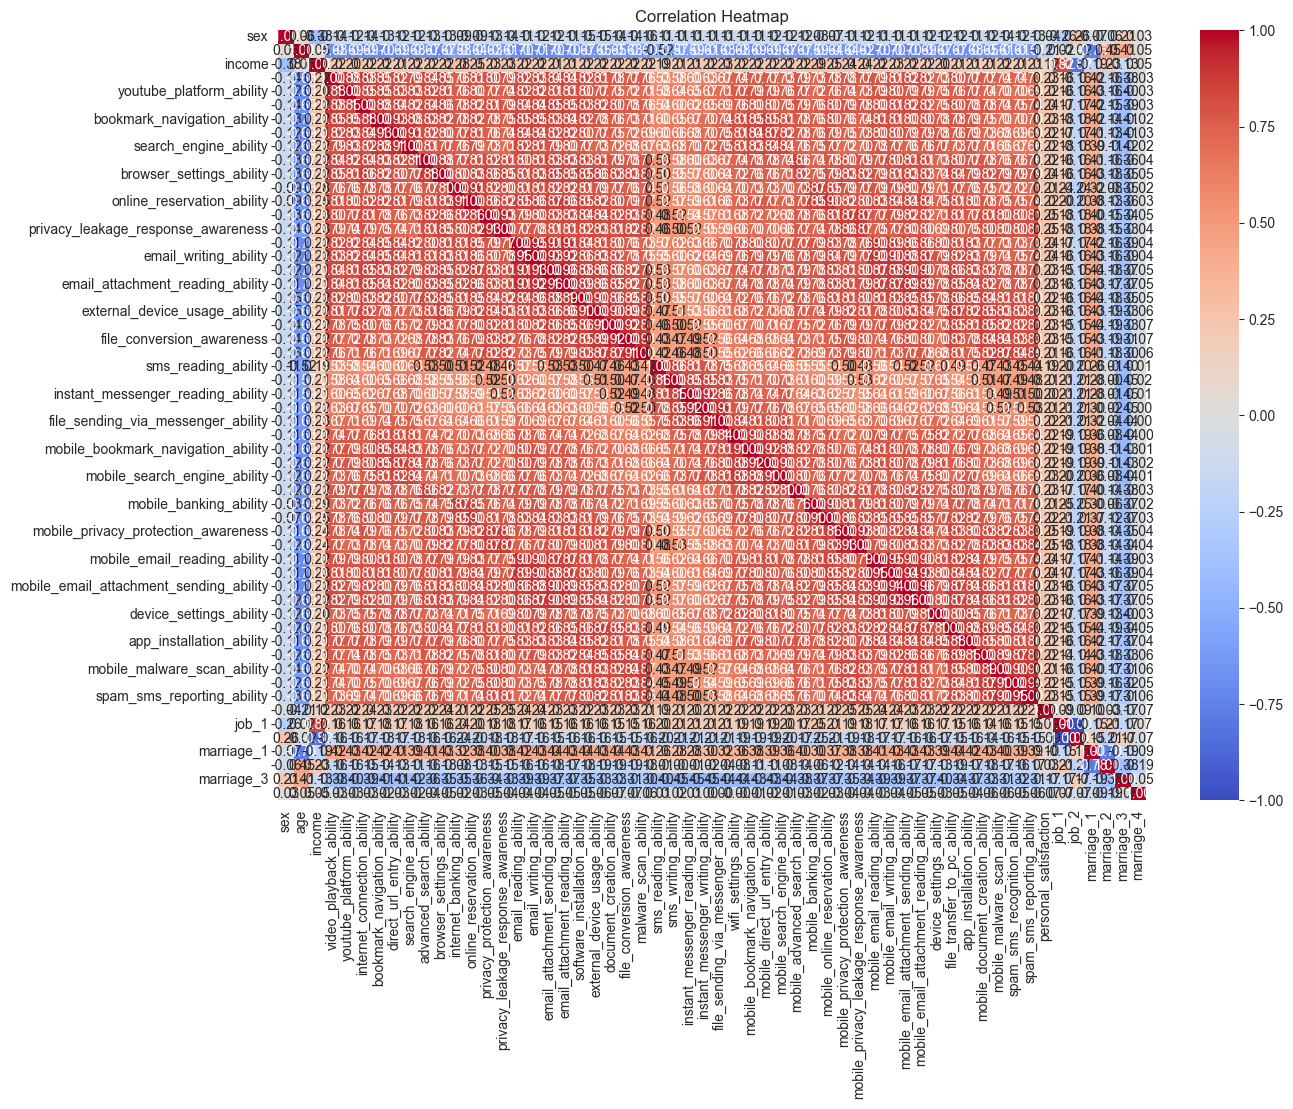

In [10]:
# 상관관계 계산
correlation_matrix = df.corr()

# 상관관계 히트맵 생성
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# 상관계수 계산 (personal_satisfaction와 다른 변수들)
correlations = df.corr()['personal_satisfaction'].sort_values(ascending=False)

# 상관계수 출력
print(correlations)

personal_satisfaction                        1.000000
mobile_privacy_leakage_response_awareness    0.254036
privacy_leakage_response_awareness           0.253677
privacy_protection_awareness                 0.250921
mobile_privacy_protection_awareness          0.249065
mobile_email_writing_ability                 0.244780
email_reading_ability                        0.244302
email_writing_ability                        0.242307
mobile_email_reading_ability                 0.240910
browser_settings_ability                     0.239986
internet_connection_ability                  0.237618
email_attachment_sending_ability             0.233430
video_playback_ability                       0.232874
document_creation_ability                    0.232233
file_conversion_awareness                    0.231273
mobile_email_attachment_reading_ability      0.231121
mobile_email_attachment_sending_ability      0.230414
bookmark_navigation_ability                  0.229053
email_attachment_reading_abi

In [12]:
# 연령별로 데이터 나눠서 보기
df1 = df[(df['age'] >= 13) & (df['age'] <= 19)]
df2 = df[(df['age'] >= 20) & (df['age'] <= 29)]
df3 = df[(df['age'] >= 30) & (df['age'] <= 39)]
df4 = df[(df['age'] >= 40) & (df['age'] <= 49)]
df5 = df[(df['age'] >= 50) & (df['age'] <= 59)]
df6 = df[(df['age'] >= 60) & (df['age'] <= 69)]
df7 = df[(df['age'] >= 70) & (df['age'] <= 79)]
df8 = df[(df['age'] >= 80) & (df['age'] <= 89)]
df9 = df[(df['age'] >= 90) & (df['age'] <= 99)]
df10 = df[(df['age'] >= 100)]
df65 = df[(df['age'] >= 65) & (df['age'] <= 100)]
df65_under = df[(df['age'] >= 13) & (df['age'] <= 64)]

In [13]:
#60대에서 상관계수 보기
# 상관계수 계산 (personal_satisfaction와 다른 변수들)
correlations = df6.corr()['personal_satisfaction'].sort_values(ascending=False)

# 상관계수 출력
print(correlations)

personal_satisfaction                        1.000000
income                                       0.187683
email_writing_ability                        0.175077
mobile_email_attachment_reading_ability      0.172768
email_reading_ability                        0.170805
email_attachment_sending_ability             0.167951
mobile_email_attachment_sending_ability      0.161705
mobile_email_reading_ability                 0.161552
mobile_search_engine_ability                 0.158463
file_sending_via_messenger_ability           0.152329
email_attachment_reading_ability             0.148396
mobile_email_writing_ability                 0.147595
mobile_document_creation_ability             0.143367
internet_banking_ability                     0.138332
mobile_banking_ability                       0.135536
document_creation_ability                    0.134868
privacy_protection_awareness                 0.133694
online_reservation_ability                   0.132644
external_device_usage_abilit

In [14]:
#70대에서 상관계수 보기
# 상관계수 계산 (personal_satisfaction와 다른 변수들)
correlations = df7.corr()['personal_satisfaction'].sort_values(ascending=False)

# 상관계수 출력
print(correlations)

personal_satisfaction                        1.000000
sms_writing_ability                          0.115708
marriage_2                                   0.105870
file_sending_via_messenger_ability           0.103940
mobile_search_engine_ability                 0.101939
instant_messenger_writing_ability            0.101690
spam_sms_reporting_ability                   0.099922
device_settings_ability                      0.098236
direct_url_entry_ability                     0.091541
search_engine_ability                        0.090078
mobile_email_reading_ability                 0.090054
spam_sms_recognition_ability                 0.089580
mobile_privacy_leakage_response_awareness    0.085752
email_attachment_sending_ability             0.081769
email_attachment_reading_ability             0.078459
mobile_email_writing_ability                 0.077554
mobile_email_attachment_reading_ability      0.076362
email_reading_ability                        0.075737
mobile_document_creation_abi

In [15]:
#80대에서 상관계수 보기
# 상관계수 계산 (personal_satisfaction와 다른 변수들)
correlations = df8.corr()['personal_satisfaction'].sort_values(ascending=False)

# 상관계수 출력
print(correlations)

personal_satisfaction                        1.000000
marriage_2                                   0.150113
instant_messenger_writing_ability            0.072339
privacy_leakage_response_awareness           0.072099
video_playback_ability                       0.071643
direct_url_entry_ability                     0.056429
email_reading_ability                        0.054825
income                                       0.053075
youtube_platform_ability                     0.046812
mobile_privacy_leakage_response_awareness    0.046086
instant_messenger_reading_ability            0.045112
wifi_settings_ability                        0.042762
software_installation_ability                0.040791
sms_writing_ability                          0.038943
internet_connection_ability                  0.037747
file_sending_via_messenger_ability           0.036668
device_settings_ability                      0.034493
mobile_email_writing_ability                 0.034400
advanced_search_ability     

In [16]:
#90대에서 상관계수 보기
# 상관계수 계산 (personal_satisfaction와 다른 변수들)
correlations = df9.corr()['personal_satisfaction'].sort_values(ascending=False)

# 상관계수 출력
print(correlations)

personal_satisfaction                        1.000000
file_conversion_awareness                    0.084257
malware_scan_ability                         0.082728
income                                       0.060206
privacy_leakage_response_awareness           0.043697
spam_sms_recognition_ability                 0.043697
sms_reading_ability                          0.029084
email_attachment_reading_ability             0.023445
email_attachment_sending_ability             0.023445
file_sending_via_messenger_ability           0.016882
job_1                                        0.009578
email_reading_ability                        0.009578
youtube_platform_ability                     0.009578
sex                                          0.007864
marriage_2                                   0.002929
bookmark_navigation_ability                 -0.001150
instant_messenger_writing_ability           -0.001358
sms_writing_ability                         -0.002177
marriage_3                  

In [17]:
#100대에서 상관계수 보기
# 상관계수 계산 (personal_satisfaction와 다른 변수들)
correlations = df10.corr()['personal_satisfaction'].sort_values(ascending=False)

# 상관계수 출력
print(correlations)

sms_writing_ability                          1.000000
personal_satisfaction                        1.000000
income                                       0.500000
direct_url_entry_ability                     0.500000
sms_reading_ability                          0.500000
age                                          0.188982
sex                                               NaN
video_playback_ability                            NaN
youtube_platform_ability                          NaN
internet_connection_ability                       NaN
bookmark_navigation_ability                       NaN
search_engine_ability                             NaN
advanced_search_ability                           NaN
browser_settings_ability                          NaN
internet_banking_ability                          NaN
online_reservation_ability                        NaN
privacy_protection_awareness                      NaN
privacy_leakage_response_awareness                NaN
email_reading_ability       

In [18]:
#100대에서 상관계수 보기
# 상관계수 계산 (personal_satisfaction와 다른 변수들)
correlations = df65.corr()['personal_satisfaction'].sort_values(ascending=False)

# 상관계수 출력
print(correlations)

personal_satisfaction                        1.000000
marriage_2                                   0.154215
sms_writing_ability                          0.147740
instant_messenger_writing_ability            0.143520
file_sending_via_messenger_ability           0.138184
mobile_search_engine_ability                 0.125588
instant_messenger_reading_ability            0.123417
sms_reading_ability                          0.119374
device_settings_ability                      0.114874
email_reading_ability                        0.112359
wifi_settings_ability                        0.104392
search_engine_ability                        0.100822
mobile_email_reading_ability                 0.100162
email_attachment_sending_ability             0.098302
mobile_email_attachment_reading_ability      0.098026
email_writing_ability                        0.094924
income                                       0.094652
direct_url_entry_ability                     0.093342
mobile_email_writing_ability

In [19]:
#100대에서 상관계수 보기
# 상관계수 계산 (personal_satisfaction와 다른 변수들)
correlations = df65_under.corr()['personal_satisfaction'].sort_values(ascending=False)

# 상관계수 출력
print(correlations)

personal_satisfaction                        1.000000
privacy_leakage_response_awareness           0.181164
mobile_privacy_leakage_response_awareness    0.177685
privacy_protection_awareness                 0.176197
mobile_privacy_protection_awareness          0.169391
file_conversion_awareness                    0.156435
browser_settings_ability                     0.155212
document_creation_ability                    0.152967
mobile_email_writing_ability                 0.152518
spam_sms_reporting_ability                   0.147611
email_writing_ability                        0.146802
internet_connection_ability                  0.146020
email_reading_ability                        0.145028
external_device_usage_ability                0.142864
mobile_email_reading_ability                 0.141635
video_playback_ability                       0.139805
mobile_document_creation_ability             0.137972
spam_sms_recognition_ability                 0.137322
file_transfer_to_pc_ability 

In [20]:
#100대에서 상관계수 보기
# 상관계수 계산 (personal_satisfaction와 다른 변수들)
correlations = df.corr()['personal_satisfaction'].sort_values(ascending=False)

# 상관계수 출력
print(correlations)

personal_satisfaction                        1.000000
mobile_privacy_leakage_response_awareness    0.254036
privacy_leakage_response_awareness           0.253677
privacy_protection_awareness                 0.250921
mobile_privacy_protection_awareness          0.249065
mobile_email_writing_ability                 0.244780
email_reading_ability                        0.244302
email_writing_ability                        0.242307
mobile_email_reading_ability                 0.240910
browser_settings_ability                     0.239986
internet_connection_ability                  0.237618
email_attachment_sending_ability             0.233430
video_playback_ability                       0.232874
document_creation_ability                    0.232233
file_conversion_awareness                    0.231273
mobile_email_attachment_reading_ability      0.231121
mobile_email_attachment_sending_ability      0.230414
bookmark_navigation_ability                  0.229053
email_attachment_reading_abi

In [21]:
print(df.isnull().sum())  # 전체 데이터 결측치
print(df65_under.isnull().sum())  # 65세 미만 데이터 결측치
print(df65.isnull().sum())  # 65세 이상 데이터 결측치

sex                                          0
age                                          0
income                                       0
video_playback_ability                       0
youtube_platform_ability                     0
internet_connection_ability                  0
bookmark_navigation_ability                  0
direct_url_entry_ability                     0
search_engine_ability                        0
advanced_search_ability                      0
browser_settings_ability                     0
internet_banking_ability                     0
online_reservation_ability                   0
privacy_protection_awareness                 0
privacy_leakage_response_awareness           0
email_reading_ability                        0
email_writing_ability                        0
email_attachment_sending_ability             0
email_attachment_reading_ability             0
software_installation_ability                0
external_device_usage_ability                0
document_crea